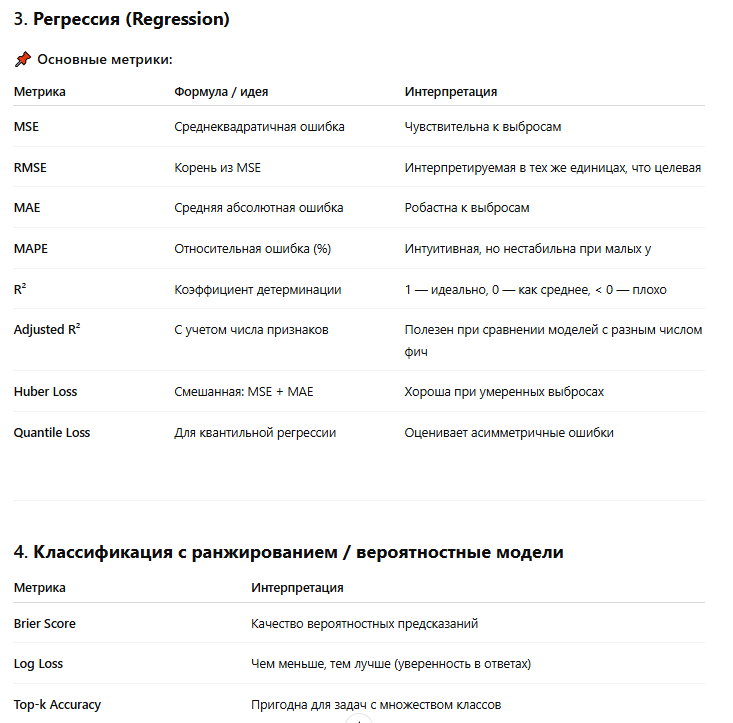

In [1]:
from IPython.display import Image
Image('t2.png')

# Визуализация оценки
Confusion Matrix — для любых классификаторов

ROC / PR Curve — бинарная классификация

Residuals Plot, Prediction vs True — для регрессии

Learning Curve, Validation Curve — для анализа переобучения

#  Метрика 1: MAE (Mean Absolute Error)

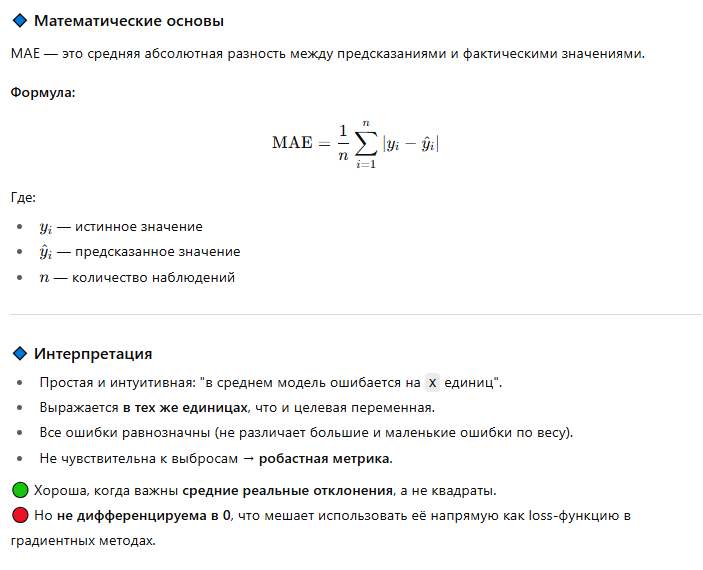

In [2]:
Image('mae.png')

In [3]:
from sklearn.metrics import mean_absolute_error

y_true = [3.0, -0.5, 2.0, 7.0]
y_pred = [2.5,  0.0, 2.1, 7.8]

mae = mean_absolute_error(y_true, y_pred)
print(f"MAE: {mae:.4f}")

errors = [abs(y - yhat) for y, yhat in zip(y_true, y_pred)]
print("Individual Errors:", errors)
print("MAE (manual):", sum(errors) / len(errors))

MAE: 0.4750
Individual Errors: [0.5, 0.5, 0.10000000000000009, 0.7999999999999998]
MAE (manual): 0.475


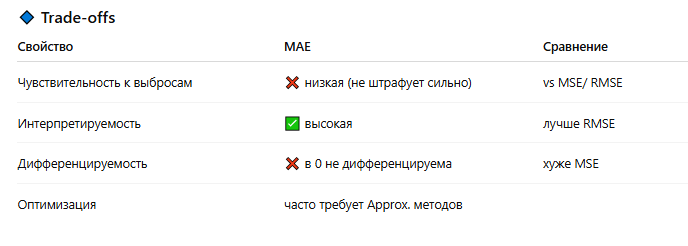

In [4]:
Image('mae_to.png')

#  Метрика 2: MSE (Mean Squared Error)

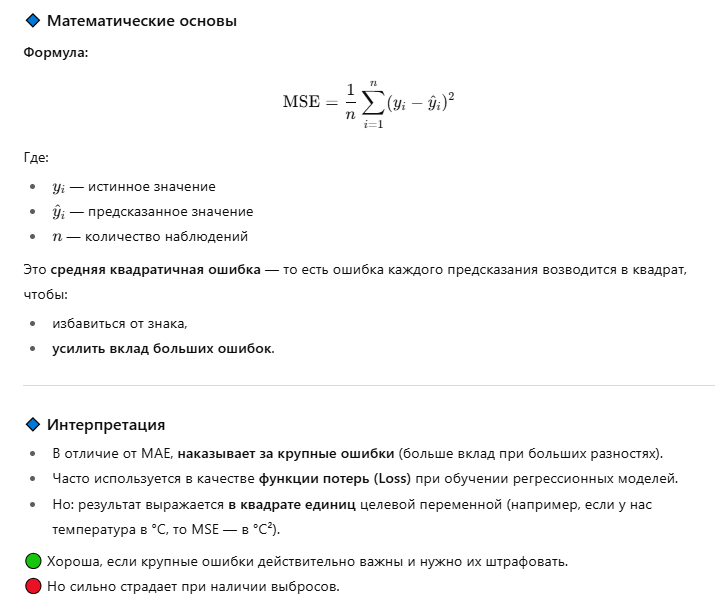

In [5]:
Image('mse.png')

In [6]:
from sklearn.metrics import mean_squared_error

y_true = [3.0, -0.5, 2.0, 7.0]
y_pred = [2.5,  0.0, 2.1, 7.8]

mse = mean_squared_error(y_true, y_pred)
print(f"MSE: {mse:.4f}")

errors = [(y - yhat)**2 for y, yhat in zip(y_true, y_pred)]
print("Squared Errors:", errors)
print("MSE (manual):", sum(errors) / len(errors))


MSE: 0.2875
Squared Errors: [0.25, 0.25, 0.010000000000000018, 0.6399999999999997]
MSE (manual): 0.2874999999999999


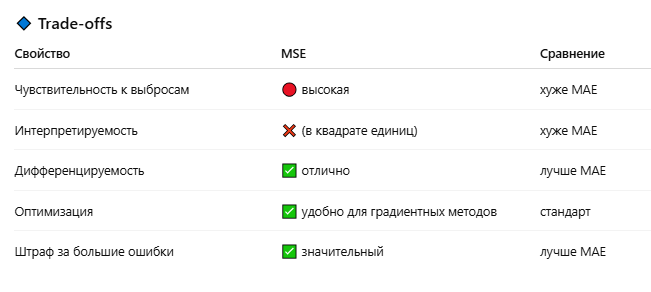

In [7]:
Image('mse_to.png')

# Метрика 3: RMSE (Root Mean Squared Error)

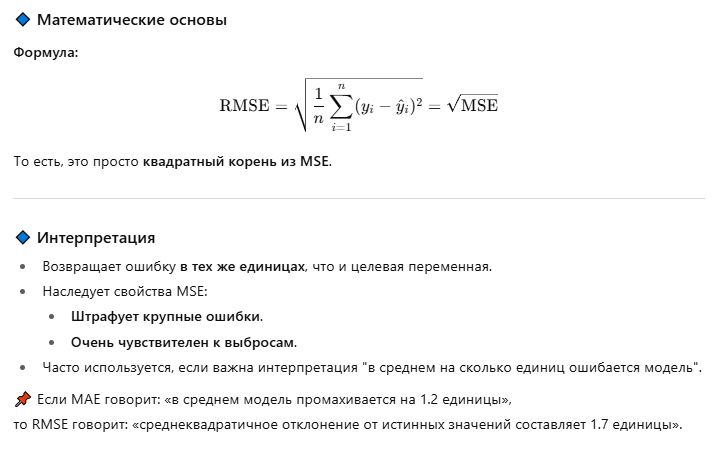

In [8]:
Image('rmse.png')

In [9]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_true = [3.0, -0.5, 2.0, 7.0]
y_pred = [2.5,  0.0, 2.1, 7.8]

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse:.4f}")

errors = [(y - yhat)**2 for y, yhat in zip(y_true, y_pred)]
mse_manual = sum(errors) / len(errors)
rmse_manual = mse_manual**0.5
print(f"RMSE (manual): {rmse_manual:.4f}")


RMSE: 0.5362
RMSE (manual): 0.5362


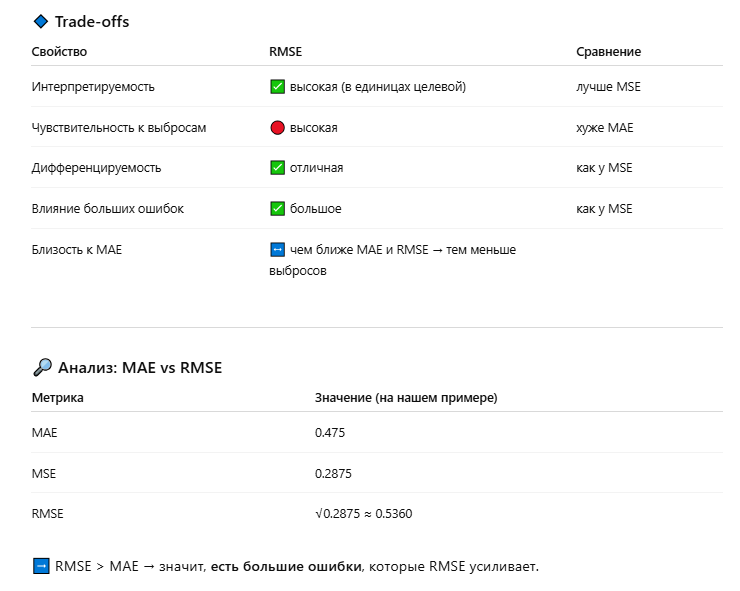

In [10]:
Image('rmse_to.png')

# Метрика 4: R² (Коэффициент детерминации)

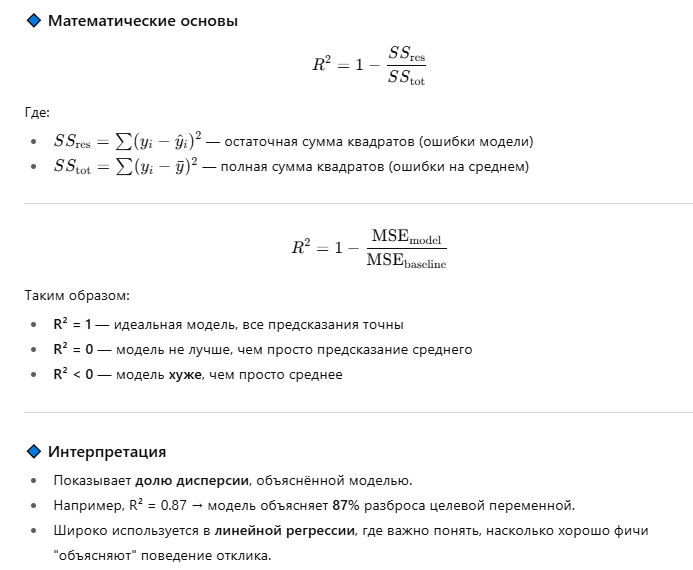

In [11]:
Image('r.png')

## Но: R² не показывает качество прогноза в абсолютном смысле — даже у плохих моделей он может быть высоким, если данные "легко предсказывать".

In [12]:
from sklearn.metrics import r2_score

y_true = [3.0, -0.5, 2.0, 7.0]
y_pred = [2.5,  0.0, 2.1, 7.8]

r2 = r2_score(y_true, y_pred)
print(f"R²: {r2:.4f}")

import numpy as np

y = np.array([3.0, -0.5, 2.0, 7.0])
yhat = np.array([2.5, 0.0, 2.1, 7.8])
y_mean = np.mean(y)

ss_tot = sum((y - y_mean)**2)
ss_res = sum((y - yhat)**2)

r2_manual = 1 - ss_res / ss_tot
print(f"R² (manual): {r2_manual:.4f}")


R²: 0.9606
R² (manual): 0.9606


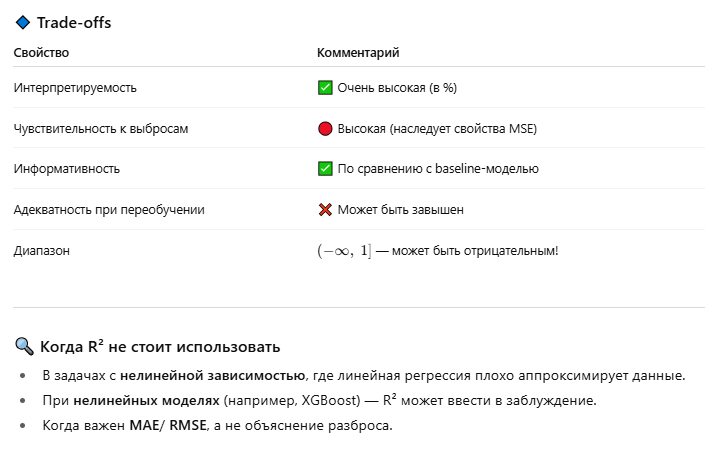

In [13]:
Image('r_to.png')

 Его основная проблема заключается в том, что он не учитывает количество признаков в модели. Другими словами, \text{R}^2 имеет тенденцию к увеличению при добавлении в обучающий набор новых признаков, даже если они не улучшают качество модели.

В таком случае сравнение моделей с разным количеством признаков становится некорректным, поэтому специально для этой цели используется скорректированный Adjusted \text{R}^2, который использует введение штрафа за добавленные признаки:

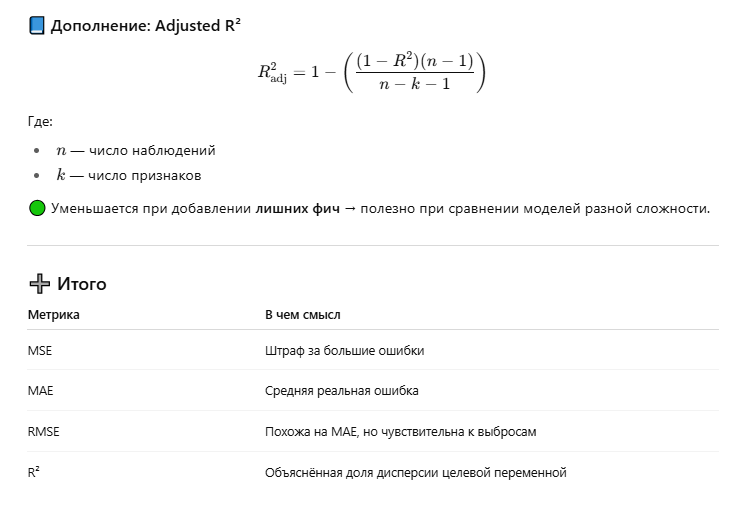

In [14]:
Image('adj.png')

# Метрика 5: MAPE (Mean Absolute Percentage Error)

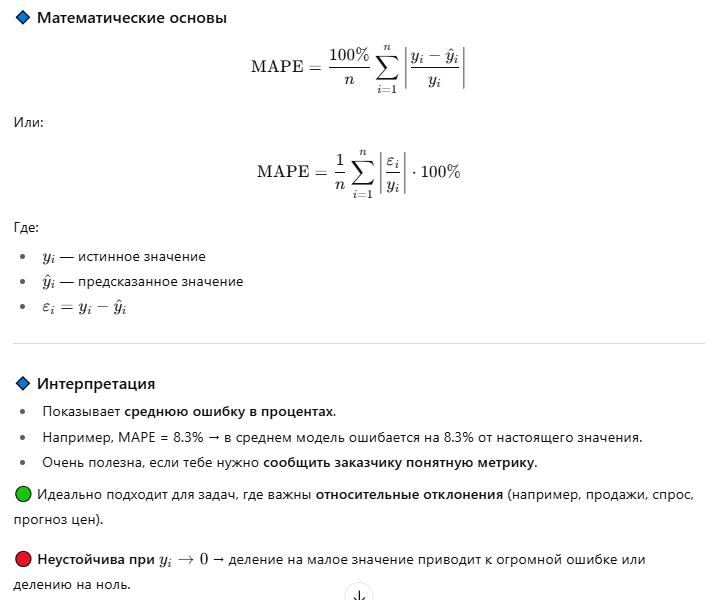

In [15]:
Image('mape.png')

In [16]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Пример:
y_true = [3.0, -0.5, 2.0, 7.0]
y_pred = [2.5,  0.0, 2.1, 7.8]

mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"MAPE: {mape:.2f}%")


MAPE: 33.27%


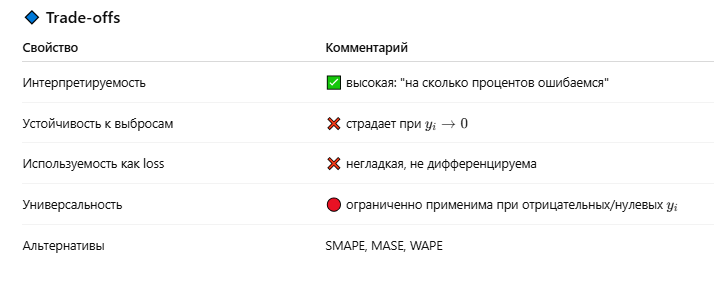

In [17]:
Image('mape_to.png')

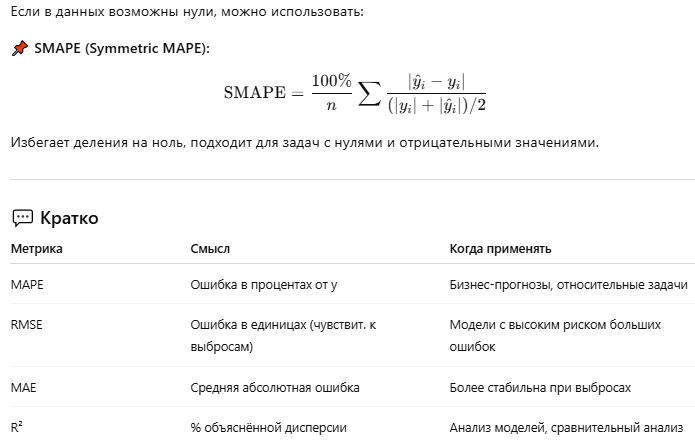

In [18]:
Image('smape.png')

# Метрика 6: SMAPE (Symmetric Mean Absolute Percentage Error)

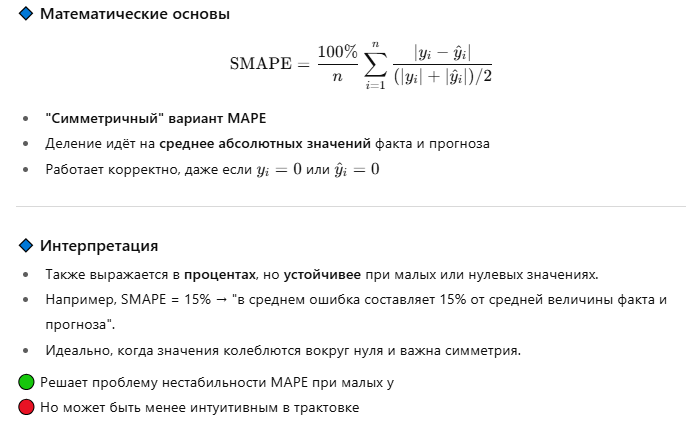

In [19]:
Image('smape_final.png')

In [22]:
import numpy as np

def smape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    return np.mean(diff) * 100

y_true = [3.0, -0.5, 2.0, 7.0]
y_pred = [2.5, 0.0, 2.1, 7.8]

print(f"SMAPE: {smape(y_true, y_pred):.2f}%")


SMAPE: 58.47%


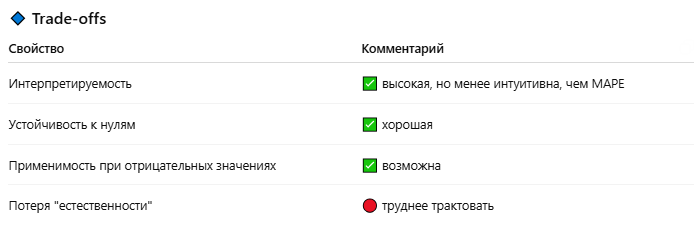

In [21]:
Image('smape_to.png')

# Метрика 7: Huber Loss

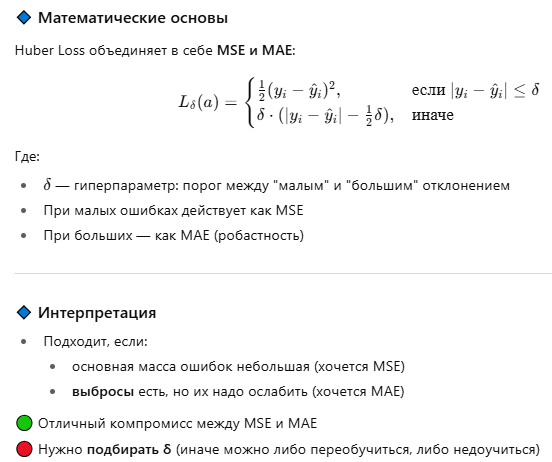

In [23]:
Image('hub.png')

In [25]:
from sklearn.metrics import mean_absolute_error
import numpy as np

def huber_loss(y_true, y_pred, delta=1.0):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    error = y_true - y_pred
    is_small = np.abs(error) <= delta
    squared_loss = 0.5 * error**2
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.mean(np.where(is_small, squared_loss, linear_loss))

print(f"huber_loss: {huber_loss(y_true, y_pred):.2f}%")

huber_loss: 0.14%


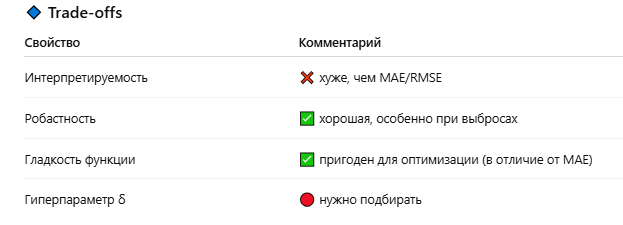

In [26]:
Image('huber_to.png')

# Метрика 8: Quantile Loss (Pinball Loss)

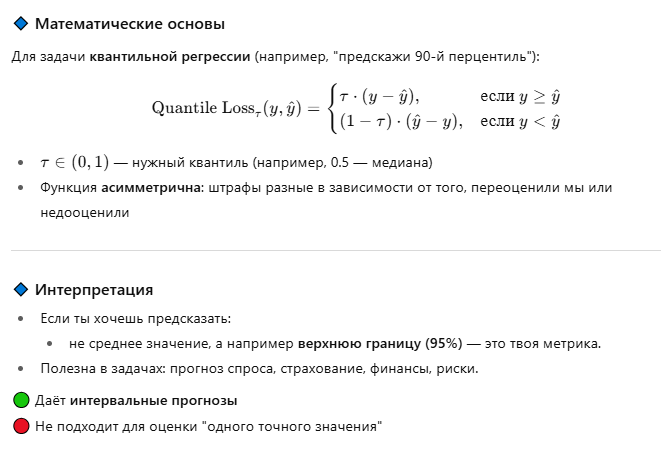

In [27]:
Image('quant.png')

In [ ]:
def quantile_loss(y_true, y_pred, tau=0.9):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    error = y_true - y_pred
    return np.mean(np.where(error >= 0, tau * error, (1 - tau) * -error))


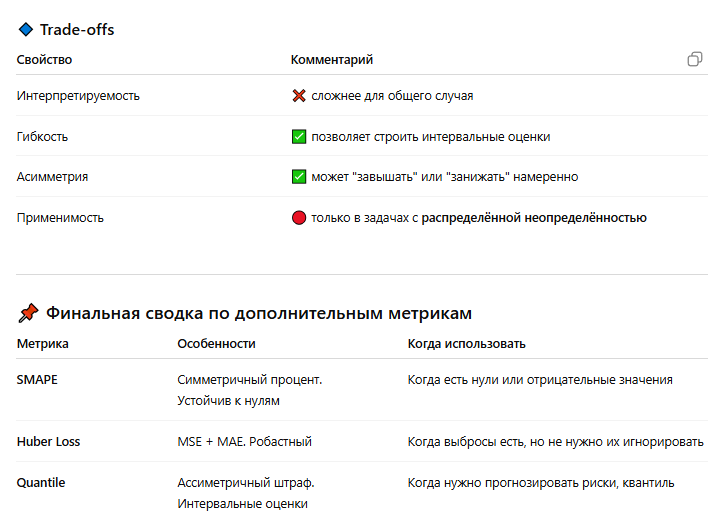

In [28]:
Image('quant_to.png')

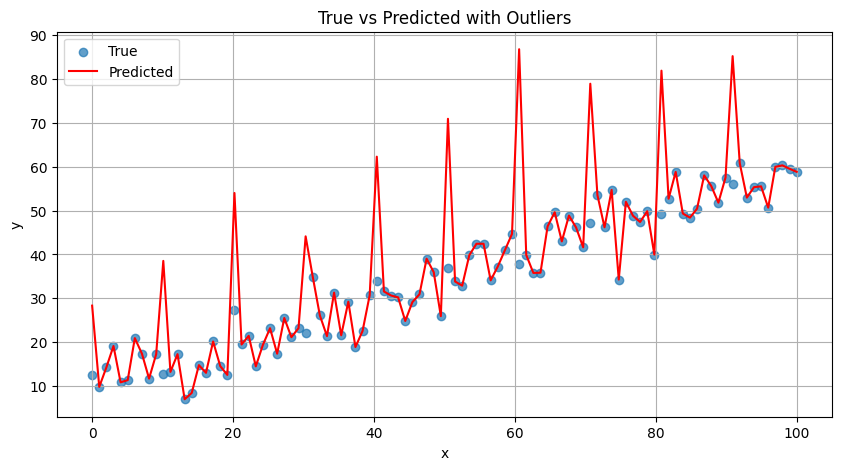

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Настройка
np.random.seed(42)

# Истинные значения (моделируем линейную зависимость + выбросы)
x = np.linspace(0, 100, 100)
y_true = 0.5 * x + 10 + np.random.normal(0, 5, size=100)
y_pred = y_true.copy()

# Добавим выбросы
y_pred[::10] += np.random.normal(30, 10, size=10)

# DataFrame для удобства
df = pd.DataFrame({'x': x, 'y_true': y_true, 'y_pred': y_pred})

# Визуализация
plt.figure(figsize=(10, 5))
plt.scatter(x, y_true, label='True', alpha=0.7)
plt.plot(x, y_pred, label='Predicted', color='r')
plt.legend()
plt.title("True vs Predicted with Outliers")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# MSE
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# SMAPE
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

smape_val = smape(y_true, y_pred)

# Huber Loss
from sklearn.metrics import mean_squared_error

def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * error**2
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.mean(np.where(is_small_error, squared_loss, linear_loss))

huber_val = huber_loss(y_true, y_pred, delta=5)

# Quantile Loss
def quantile_loss(y_true, y_pred, quantile=0.9):
    error = y_true - y_pred
    return np.mean(np.maximum(quantile * error, (quantile - 1) * error))

quantile_val = quantile_loss(y_true, y_pred, quantile=0.9)

# Вывод
print(f"MSE:    {mse:.2f}")
print(f"RMSE:   {rmse:.2f}")
print(f"MAE:    {mae:.2f}")
print(f"SMAPE:  {smape_val:.2f}%")
print(f"R^2:    {r2:.4f}")
print(f"Huber:  {huber_val:.2f}")
print(f"Quantile Loss (q=0.9): {quantile_val:.2f}")


MSE:    93.82
RMSE:   9.69
MAE:    2.95
SMAPE:  6.52%
R^2:    0.6071
Huber:  13.50
Quantile Loss (q=0.9): 0.30


| Метрика        | Описание и интерпретация (в контексте набора)                                                                      |
| -------------- | ------------------------------------------------------------------------------------------------------------------ |
| **MSE**        | Очень чувствителен к выбросам — показывает большое значение.                                                       |
| **RMSE**       | Имеет ту же шкалу, что и целевая переменная. Выбросы сильно влияют.                                                |
| **MAE**        | Менее чувствителен к выбросам, отражает среднюю абсолютную ошибку.                                                 |
| **SMAPE**      | Учитывает относительную ошибку — позволяет сравнивать ошибки при разных масштабах.                                 |
| **R²**         | Низкое значение из-за выбросов — модель плохо объясняет дисперсию.                                                 |
| **Huber Loss** | Сбалансированная альтернатива между MSE и MAE — умеренно штрафует выбросы.                                         |
| **Quantile**   | Особенно полезна для задач прогноза квантилей (например, доверительный интервал). При `q=0.9` штрафует недооценку. |


* Выбросы драматически портят MSE, RMSE и R².
* MAE и Huber более устойчивы — лучше отражают «среднестатистическую» ошибку.
* SMAPE важна при разном масштабе предсказаний.
* Quantile Loss позволяет "настроить" поведение в зависимости от бизнес-задачи (наказывать недооценку или переоценку сильнее).



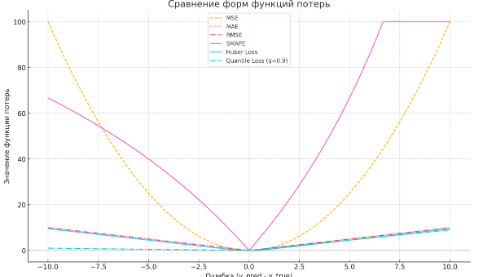

In [31]:
Image('graph.png')

🔹 MSE (Mean Squared Error)
Форма: парабола.

Чувствителен к выбросам (ошибки > 5 быстро становятся большими).

Используется, когда важно сильно наказывать большие ошибки.

🔹 MAE (Mean Absolute Error)
Линейный рост с ошибкой.

Устойчив к выбросам.

Хорош при наличии шумных данных.

🔹 RMSE (Root Mean Squared Error)
Похожа на MSE, но немного "приподнята".

Интерпретируемо в тех же единицах, что и сами значения.

🔹 SMAPE (Symmetric Mean Absolute Percentage Error)
Ограничена сверху (до 100%).

Выражает ошибку в процентах относительно масштаба истинного и предсказанного значения.

Нестабильна при нулях в знаменателе (в примере ограничена clip).

🔹 Huber Loss
Соединяет MSE и MAE: квадратична около нуля, линейна вне порога delta.

Стабильна к выбросам, но гладкая, что полезно при градиентном обучении.

🔹 Quantile Loss (например, для q = 0.9)
Асимметричная.

Используется для предсказания заданной квантили.

Например, q = 0.9: функция больше наказывает недооценку, чем переоценку.

# Bias-Variance Decomposition

рассмотрим разложение ошибки модели на смещение, разброс и случайный шум в данных. Это полезный инструмент, позволяющий оценить влияние вышеописанных компонентов общей тестовой ошибки и подобрать наиболее оптимальную модель с точки зрения её сложности.

Вывод разложения ошибки для MSE
Для простоты рассмотрим задачу регрессии со среднеквадратичной функцией потерь. Предположим, что целевое значение y можно выразить с помощью некоторой детерминированной функции f следующим образом:

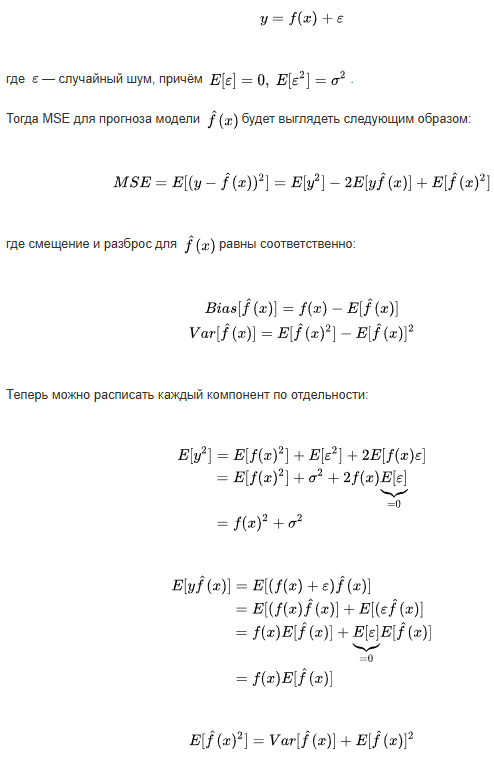

In [34]:
Image('math_bvd.png')

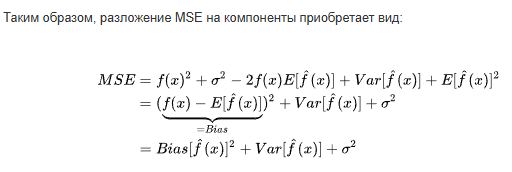

In [35]:
Image('bvd.png')

Полученное уравнение показывает и доказывает, что общая ошибка прогноза модели состоит из квадрата смещения (насколько модель ошибается в среднем), разброса (как предсказания модели различаются при разных данных) и неустранимой ошибки из-за шума в данных. Обычно высокие значения смещения и разброса соответствуют недообучению и переобучению модели соответственно, поэтому в идеале нам хотелось бы устремить эти значения к нулю. К сожалению, на практике это практически невозможно, поэтому задача сводится к поиску оптимального баланса между смещением и разбросом. На изображении ниже представлены возможные случаи их сочетания.



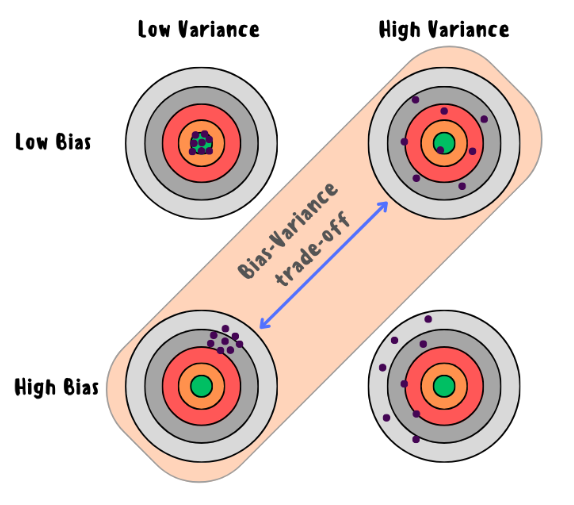

In [37]:
Image('bvd_to.png')

### Bias-Variance trade-off
#### В итоге остаётся два варианта:
1) создание простой модели, чтобы она была стабильной и менее чувствительной (низкий разброс), но при этом она может не улавливать все закономерности в данных (высокое смещение);
2) создание сложной модели, чтобы она могла улавливать более тонкие закономерности (низкое смещение), однако в таком случае повышается чувствительность к шуму и отдельным точкам в данных (высокий разброс).

Такое явление, как поиск компромисса между смещением и разбросом, в литературе называется bias-variance trade-off, из которого следует, что общая ошибка на тестовой выборке имеет вид U-образной кривой.

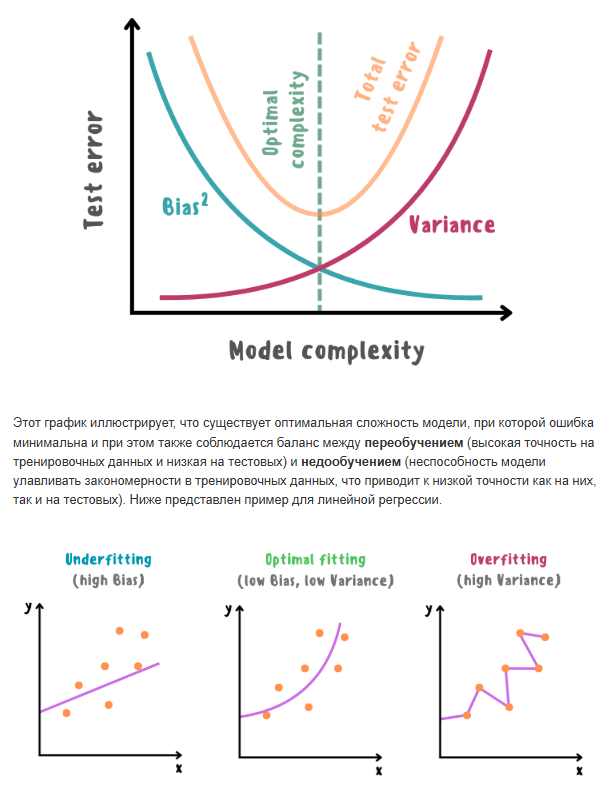

In [38]:
Image('bvd_graph.png')

# Что мы видим на каждом графике:
### underfitting:
* Высокий bias (смещение) — предсказания сильно отклоняются от реальности.
* Низкая variance — предсказания стабильны при разных обучающих выборках.
* Модель слишком простая.

### более сбалансированная модель:
* Невысокий bias и умеренная variance.
* Средняя предсказанная кривая близка к истинной функции.
* Это близко к "золотой середине" между bias и variance.

### overfitting:
* Низкий bias — модель точно подгоняет данные.
* Высокая variance — модель чувствительна к изменениям обучающей выборки.
* Модель переобучается: хорошо описывает обучающую выборку, но плохо обобщает.

| Компонент    | Источник ошибки                   | Способ борьбы                |
| ------------ | --------------------------------- | ---------------------------- |
| **Bias²**    | Модель слишком простая (underfit) | Увеличить сложность модели   |
| **Variance** | Модель слишком сложная (overfit)  | Регуляризация, больше данных |
| **Шум**      | Случайность в самой задаче        | Никак — принять как данность |
